# ACCRE Project - Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in fullsample_cleaned.csv as a dataframe
jobs = pd.read_csv("../data/fullsample_cleaned.csv")

In [3]:
# Convert BEGIN and END columns to datetime type
jobs['BEGIN'] = pd.to_datetime(jobs['BEGIN'])
jobs['END'] = pd.to_datetime(jobs['END'])

# Convert REQTIME, USEDTIME, JOBLENGTH columns to timedelta type
jobs['REQTIME'] = pd.to_timedelta(jobs['REQTIME'])
jobs['USEDTIME'] = pd.to_timedelta(jobs['USEDTIME'])
jobs['JOBLENGTH'] = pd.to_timedelta(jobs['JOBLENGTH'])

In [4]:
# Count the amount of jobs per hour and create new column
jobs['GROUP1H'] = jobs.groupby(pd.Grouper(key='END',freq='H')).transform('count')['JOBID'].sort_index()

## Question 1: Calculate some descriptive statistics for how many jobs per hour are being completed.

## Question 2: What does the completions per hour look like over the time span of the dataset?

## Question 3: Are there weekly trends, and has it been increasing over the last year?

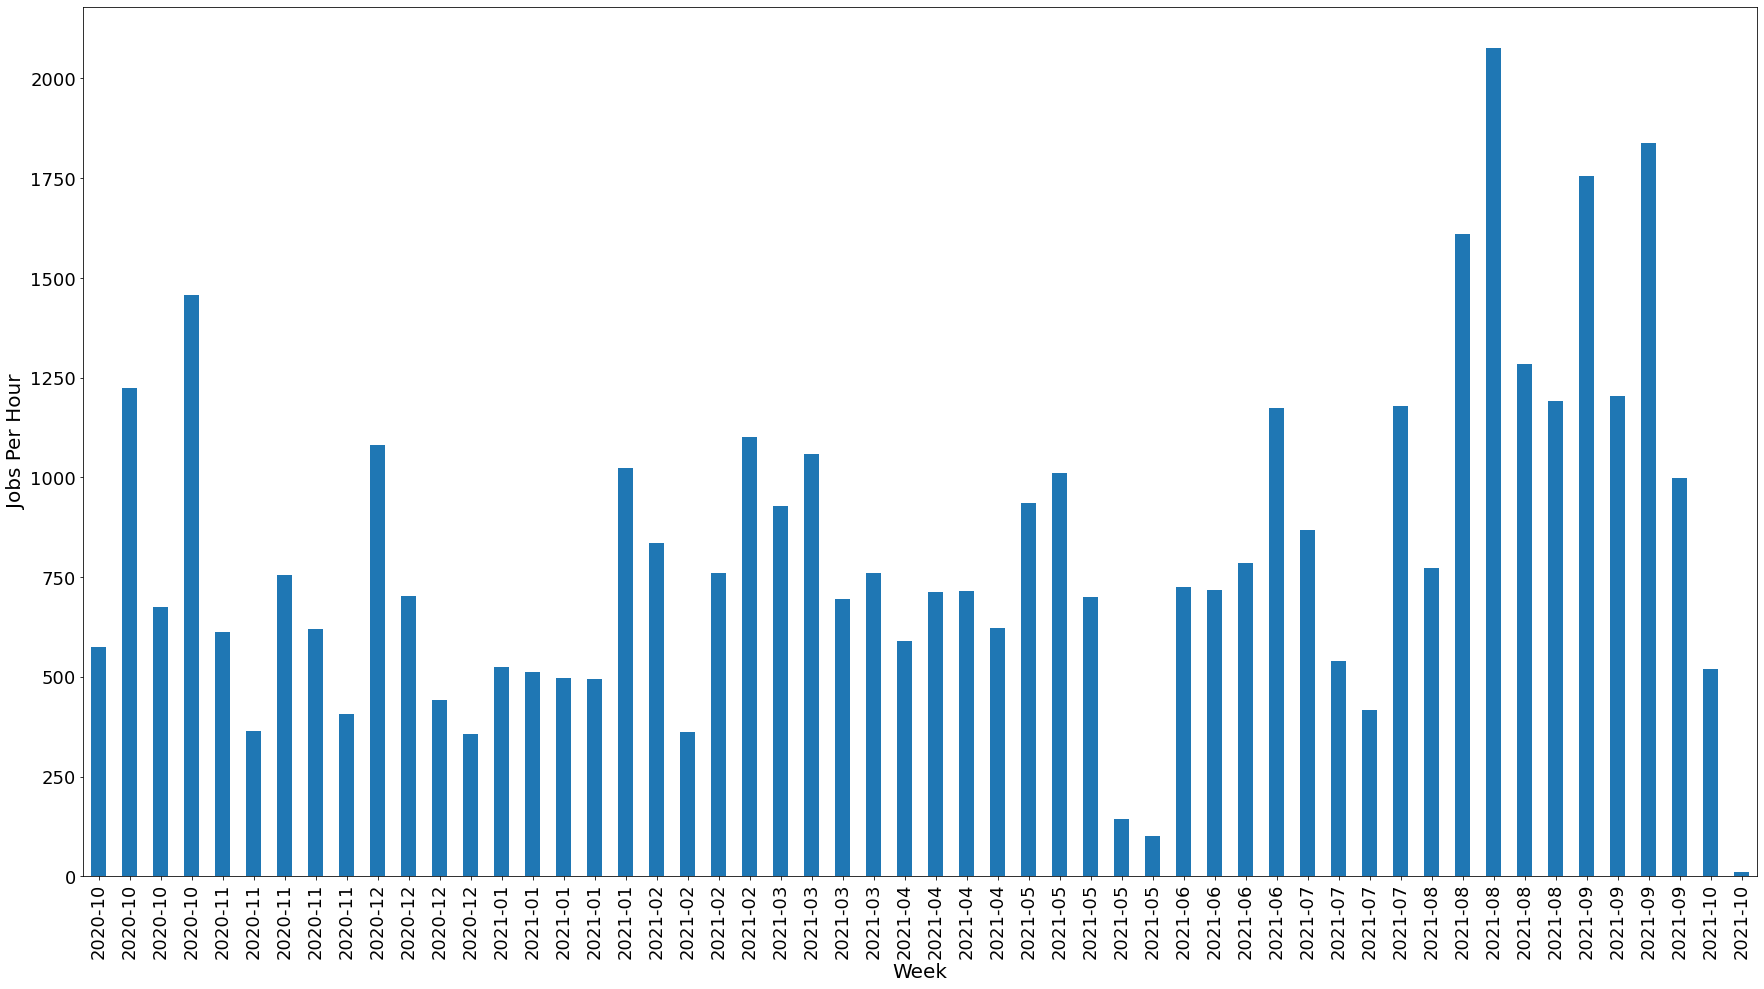

In [9]:
weekly_jobs_ended_by_hour = jobs.groupby(pd.Grouper(key='END',freq='W')).count()/168

fig, ax = plt.subplots(figsize=(30,16))
weekly_jobs_ended_by_hour['JOBID'].plot(kind='bar', ax=ax)

date_labels = weekly_jobs_ended_by_hour.index.strftime('%Y-%m')
plt.xlabel('Week', fontsize=20)
ax.set_xticklabels(labels=date_labels, rotation=90, fontsize=18)

plt.ylabel('Jobs Per Hour', fontsize=20)
plt.yticks(fontsize=18);

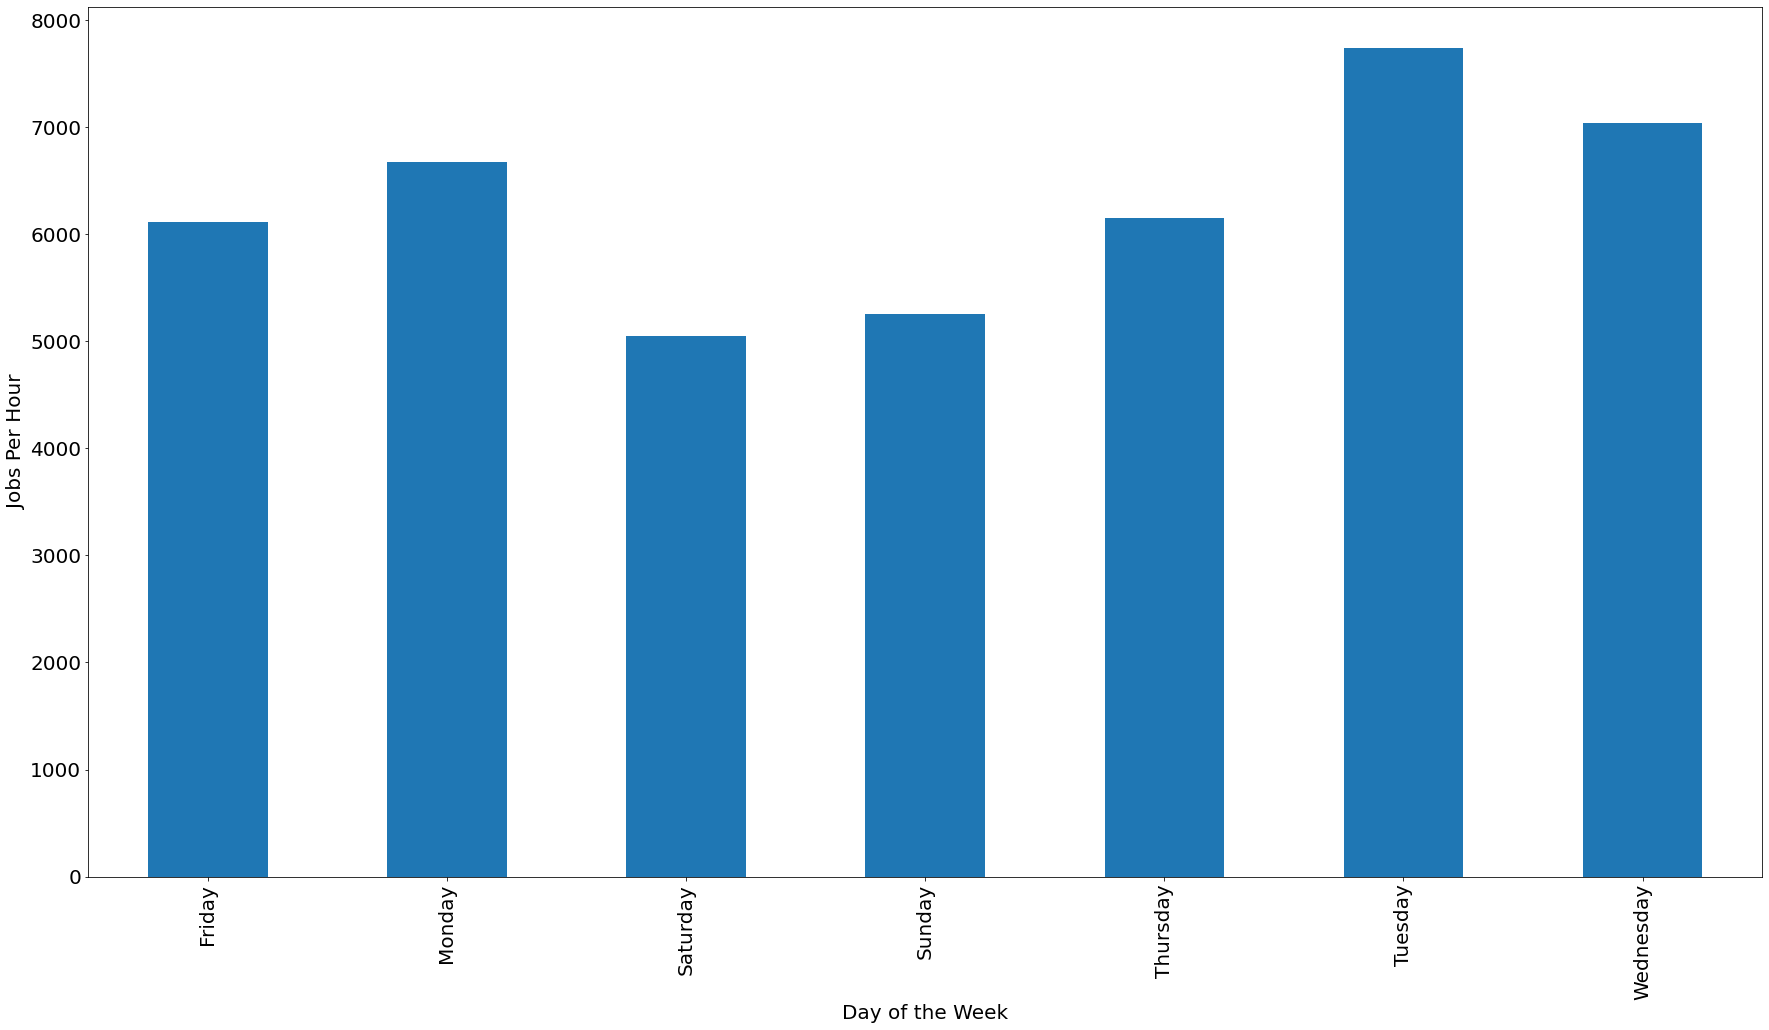

In [10]:
daily_jobs_ended_per_hour = jobs.groupby(jobs['END'].dt.day_name()).count()['JOBID']/168

fig, ax = plt.subplots(figsize=(30,16))
daily_jobs_ended_per_hour.plot(kind='bar')

plt.xlabel('Day of the Week', fontsize=20)
day_labels = daily_jobs_ended_per_hour.index
ax.set_xticklabels(labels=day_labels, rotation=90, fontsize=20)

plt.ylabel('Jobs Per Hour', fontsize=20)
plt.yticks(fontsize=20);

## Question 4: Does the job state affect completions per hour? i.e. if I only look at jobs with exit code 0:0 in the "COMPLETED" state, is that a similar number of completions per hour as with all jobs, failed or cancelled? This will indicate if the load on the scheduler is by user design or is a result of users not sufficiently testing their jobs before submitting very large arrays. We also expect that most job completions will be in the "production" partition, but is this actually true?